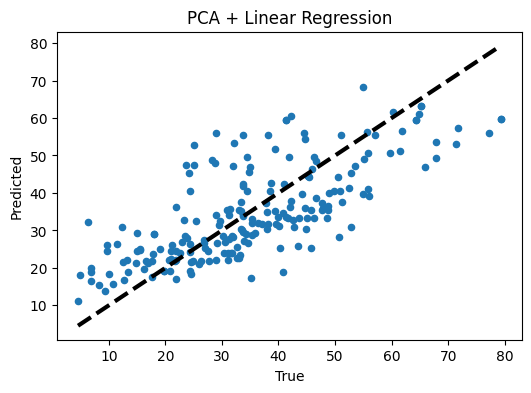

PCA + Linear Regression:
RMSE: 10.609595633977868
MSE: 112.56351951652223
MAE: 8.518805227221984
R2 Score: 0.5424581120371326


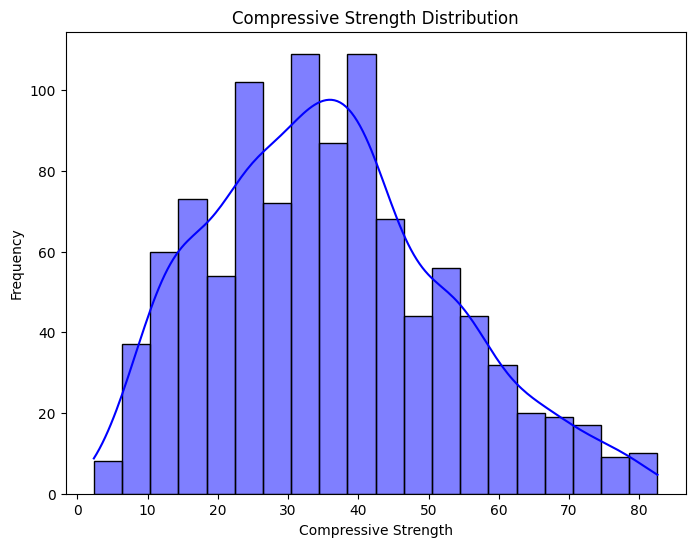

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA

# Load the dataset
file_path = r"C:\Users\maddi\OneDrive\Desktop\year - 1\imi\Concrete_Data.xls"
data = pd.read_excel(file_path)

# Data preprocessing
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer", "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
mapper = {col: req_col_names[i] for i, col in enumerate(data.columns)}
data = data.rename(columns=mapper)

# Train-test split
X = data.iloc[:, :-1]   
y = data.iloc[:, -1]          
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standardize the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Model training and evaluation with PCA
pca = PCA(n_components=7)  
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

lr_pca = LinearRegression()
lr_pca.fit(x_train_pca, y_train)
y_pred_lr_pca = lr_pca.predict(x_test_pca)

# Evaluation
rmse_lr_pca = np.sqrt(mean_squared_error(y_test, y_pred_lr_pca))
mse_lr_pca = mean_squared_error(y_test, y_pred_lr_pca)
mae_lr_pca = mean_absolute_error(y_test, y_pred_lr_pca)
r2_lr_pca = r2_score(y_test, y_pred_lr_pca)

# Scatter plot for PCA + Linear Regression
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_lr_pca, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('PCA + Linear Regression')
plt.show()

# Explanation for each output
print("PCA + Linear Regression:")
print("RMSE:", rmse_lr_pca)
print("MSE:", mse_lr_pca)
print("MAE:", mae_lr_pca)
print("R2 Score:", r2_lr_pca)

# Plotting Compressive Strength Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['CC_Strength'], kde=True, color='blue', bins=20)
plt.title('Compressive Strength Distribution')
plt.xlabel('Compressive Strength')
plt.ylabel('Frequency')
plt.show()
